In [2]:
from scapy.all import rdpcap
import matplotlib.pyplot as plt

In [3]:
def calculate_throughput(flow_packets):
    total_bytes = sum(len(packet) * 8 for packet in flow_packets)
    total_time = flow_packets[-1].time - flow_packets[0].time
    if(total_time==0):
        total_time =1
    return total_bytes / total_time  # bits per second

def calculate_latency(flow_packets):
    latencies = [(packet.time - flow_packets[0].time) * 1000 for packet in flow_packets]
    return sum(latencies) / len(latencies)  # milliseconds

def analyze_pcap(pcap_file):
    packets = rdpcap(pcap_file)

    # Initialize dictionaries to store flows and their packets
    tcp_flows = {}
    for packet in packets:
        if 'TCP' in packet:
            flow_key = (packet['IP'].src, packet['TCP'].sport, packet['IP'].dst, packet['TCP'].dport)
            if flow_key not in tcp_flows:
                tcp_flows[flow_key] = []
            tcp_flows[flow_key].append(packet)

    # Lists to store throughput and latency for each flow
    throughput_values = []
    latency_values = []

    # Calculate throughput and latency for each TCP flow
    for flow_key, flow_packets in tcp_flows.items():
        throughput = calculate_throughput(flow_packets)
        latency = calculate_latency(flow_packets)
        throughput_values.append(throughput)
        latency_values.append(latency)
        print(f"Flow {flow_key}:")
        print(f"Average Throughput: {throughput} bps")
        print(f"Average Latency: {latency} ms")
        print()

    return throughput_values, latency_values

Analyzing sniffs/epollSniff500.pcap:
Flow ('10.0.2.4', 45114, '10.0.2.15', 8080):
Average Throughput: 116198.1744842577674208928611 bps
Average Latency: 1998.477236363636363636363636 ms

Flow ('10.0.2.15', 8080, '10.0.2.4', 45114):
Average Throughput: 16100.11770161804591980539858 bps
Average Latency: 2087.281460674157303370786517 ms

Flow ('10.0.2.4', 45116, '10.0.2.15', 8080):
Average Throughput: 116436.1365424860626923388269 bps
Average Latency: 1991.094763636363636363636364 ms

Flow ('10.0.2.15', 8080, '10.0.2.4', 45116):
Average Throughput: 16131.29042619071212793027202 bps
Average Latency: 2079.904213483146067415730337 ms

Flow ('10.0.2.4', 45126, '10.0.2.15', 8080):
Average Throughput: 116467.4808608267443215651897 bps
Average Latency: 1990.328654545454545454545455 ms

Flow ('10.0.2.15', 8080, '10.0.2.4', 45126):
Average Throughput: 16132.47332442929914340073707 bps
Average Latency: 2078.443056179775280898876404 ms

Flow ('10.0.2.4', 45132, '10.0.2.15', 8080):
Average Throughput

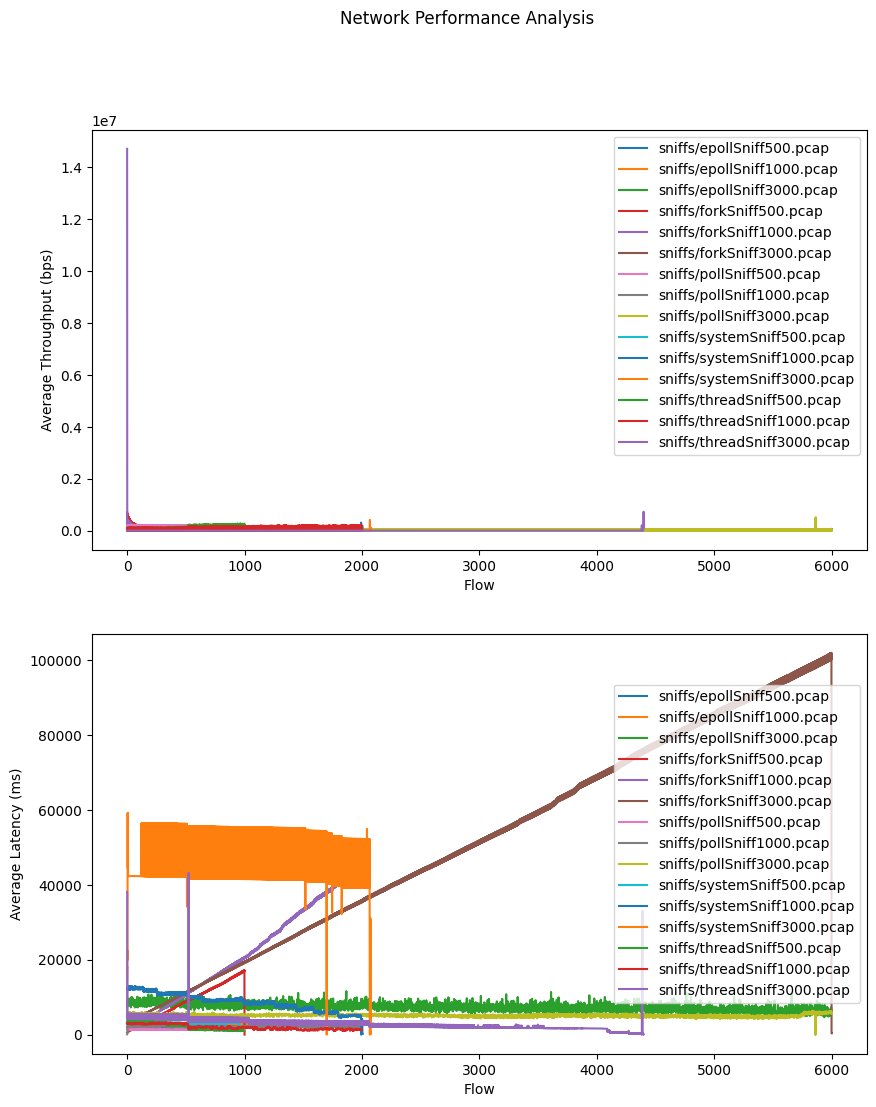

In [4]:

pcap_files = [
    'sniffs/epollSniff500.pcap',
    'sniffs/epollSniff1000.pcap',
    'sniffs/epollSniff3000.pcap',
    'sniffs/forkSniff500.pcap',
    'sniffs/forkSniff1000.pcap',
    'sniffs/forkSniff3000.pcap',
    'sniffs/pollSniff500.pcap',
    'sniffs/pollSniff1000.pcap',
    'sniffs/pollSniff3000.pcap',
    'sniffs/systemSniff500.pcap',
    'sniffs/systemSniff1000.pcap',
    'sniffs/systemSniff3000.pcap',
    'sniffs/threadSniff500.pcap',
    'sniffs/threadSniff1000.pcap',
    'sniffs/threadSniff3000.pcap'
]
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.suptitle('Network Performance Analysis')

for pcap_file in pcap_files:
    print(f"Analyzing {pcap_file}:")
    throughput_values, latency_values = analyze_pcap(pcap_file)
    axs[0].plot(throughput_values, label=pcap_file)
    axs[1].plot(latency_values, label=pcap_file)

axs[0].set_xlabel('Flow')
axs[0].set_ylabel('Average Throughput (bps)')
axs[0].legend()
axs[1].set_xlabel('Flow')
axs[1].set_ylabel('Average Latency (ms)')
axs[1].legend()

In [5]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>